In [2]:
!pip install textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from textdistance import levenshtein

In [85]:
from PIL import Image, ImageDraw, ImageFont

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
path = '/content/drive/MyDrive/STUDY_MY/Programming/cldf-datasets-phoible-350563f/cldf/'

In [10]:
df_languages = pd.read_csv(path + 'languages.csv')

In [11]:
df_languages.head()

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name
0,cogu1240,Cogui,South America,10.94850,-73.80430,cogu1240,kog,chib1249,Chibchan
1,norw1258,Norwegian,Eurasia,59.92000,10.71000,norw1258,nor,indo1319,Indo-European
2,unam1242,Unami,North America,35.02640,-98.32010,unam1242,unm,algi1248,Algic
3,lako1244,Lakota Dida,Africa,5.86012,-5.40633,lako1244,dic,atla1278,Atlantic-Congo
4,yala1262,Yalarnnga,Australia,-21.73100,139.51100,yala1262,ylr,pama1250,Pama-Nyungan


In [12]:
df_values = pd.read_csv(path + 'values.csv', error_bad_lines=False)

<ipython-input-12-42cf4b545c81>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_values = pd.read_csv(path + 'values.csv', error_bad_lines=False)


In [14]:
df_values.head()

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Marginal,Allophones,Contribution_ID
0,1,kore1280,72FB536ACFF408163656BBCDAFCAC6F6,a,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,a,1
1,2,kore1280,2F272C9C5FA2DA70706B565B2DC46DE8,aː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,aː,1
2,3,kore1280,B6D180EA250E6FBDE82C3D1F1BB4A39C,æ,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,ɛ æ,1
3,4,kore1280,CB37024CEAE9409F30FC756C0578E93C,æː,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,æː,1
4,5,kore1280,199408E3D0668F10F475143F0E8CC0CB,e,NaN,NaN,cho1967;martin1951;martin1954;martinlee1969;ki...,NaN,e,1


In [112]:
random_langs = df_languages.loc[df_languages['Macroarea'] == 'Eurasia'].sample(30, random_state=20)

In [113]:
random_langs

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name
905,saur1248,Saurashtra,Eurasia,9.99172,77.94270,saur1248,saz,indo1319,Indo-European
1556,kara1467,Kara-Kalpak,Eurasia,39.98000,63.32230,kara1467,kaa,turk1311,Turkic
1681,kham1282,Khams Tibetan,Eurasia,31.93130,91.70620,kham1282,khg,sino1245,Sino-Tibetan
1674,finn1318,Finnish,Eurasia,64.76280,25.55770,finn1318,fin,ural1272,Uralic
1404,nort2697,North Azerbaijani,Eurasia,40.97770,46.47370,nort2697,azj,turk1311,Turkic
1634,baim1244,Baima,Eurasia,33.10010,103.95200,baim1244,bqh,sino1245,Sino-Tibetan
601,digo1242,Digor,Eurasia,NaN,NaN,digo1242,oss,indo1319,Indo-European
69,serb1264,Serbian,Eurasia,44.32380,21.91920,serb1264,srp,indo1319,Indo-European
1228,jerr1238,Jerriais,Eurasia,NaN,NaN,jerr1238,nrf,indo1319,Indo-European
1597,kuay1244,Kuay,Eurasia,NaN,NaN,kuay1244,kdt,aust1305,Austroasiatic


In [116]:
ru_code = df_languages.loc[df_languages['Name'] == 'Russian']['ID'].to_list()[0]

In [117]:
codes = list(set(list(random_langs['ID'])))
codes.append(ru_code)

In [118]:
alphabets_of_chosen_languages = {}
for code in codes:
  alphabets_of_one_language = df_values.loc[df_values['Language_ID'] == code]
  contrib_id = alphabets_of_one_language['Contribution_ID'].to_list()[0]
  alphabet = sorted(alphabets_of_one_language.loc[alphabets_of_one_language['Contribution_ID'] == contrib_id]['Value'].to_list())
  lang_name = df_languages.loc[df_languages['ID'] == code]['Name'].to_list()[0]
  alphabets_of_chosen_languages[lang_name] = alphabet

In [119]:
alphabets_of_chosen_languages

{'Hunzib': ['a',
  'aː',
  'ã',
  'b',
  'cç',
  'cçʼ',
  'd',
  'h',
  'i',
  'iː',
  'ĩ',
  'k',
  'kʼ',
  'l',
  'm',
  'n',
  'o',
  'oː',
  'õ',
  'p',
  'pʼ',
  'q',
  'qʼ',
  'r',
  's',
  't',
  'ts',
  'tsʼ',
  'tɬ',
  'tɬʼ',
  'tɬʼː',
  'tɬː',
  'tʼ',
  'tʼː',
  'u',
  'uː',
  'ũ',
  'x',
  'z',
  'ç',
  'ħ',
  'ɑ',
  'ɑː',
  'ɑ̃',
  'ə',
  'əː',
  'ə̃',
  'ɛ',
  'ɛː',
  'ɛ̃',
  'ɡ',
  'ɨ',
  'ɨː',
  'ɨ̃',
  'ɬ',
  'ʁ',
  'ʔ',
  'ʕ',
  'ʝ',
  'χ'],
 'Turkmen': ['b',
  'd̠ʒ',
  'd̪',
  'h',
  'i',
  'iː',
  'j',
  'k',
  'l̪',
  'm',
  'n̪',
  'pʰ',
  't̠ʃ',
  't̪ʰ',
  'u',
  'uː',
  'w',
  'x',
  'y',
  'yː',
  'æː',
  'ð',
  'ŋ',
  'œ',
  'œː',
  'ɑ',
  'ɑː',
  'ɔ',
  'ɔː',
  'ɛ',
  'ɡ',
  'ɯ',
  'ɯː',
  'ɾ',
  'ʃ',
  'ʒ',
  'θ'],
 'Saurashtra': ['a',
  'aː',
  'b',
  'b̤',
  'cç',
  'cçʰ',
  'd̪',
  'd̪̤',
  'e',
  'eː',
  'h',
  'i',
  'iː',
  'j',
  'k',
  'kʰ',
  'l',
  'm',
  'm̤',
  'n',
  'o',
  'oː',
  'p',
  'pʰ',
  'r',
  's',
  't̪',
  't̪ʰ',
  'u',
  'uː',
  

In [120]:
class bicluster:
  def __init__(self,vec,left=None,right=None,distance=0.0,id=None):
    self.left=left
    self.right=right
    self.vec=vec # вектор признаков
    self.id=id # id объединения
    self.distance=distance # степень схожести между левым и правым

In [121]:
def hcluster(alphabets,distance=levenshtein):
  distances={}
  currentclustid=-1
  only_alphabets = list(alphabets.values())
  only_alphabets = ["".join(a) for a in only_alphabets]
  only_names = list(alphabets.keys())
  clust=[bicluster(only_alphabets[i],id=i) for i in range(len(only_alphabets))]

  while len(clust)>1:
    lowestpair=(0,1)
    closest=distance(clust[0].vec,clust[1].vec)
    # loop through every pair looking for the smallest distance

    for i in range(len(clust)):
      for j in range(i+1,len(clust)):
        # distances is the cache of distance calculations
        if (clust[i].id,clust[j].id) not in distances: 
          distances[(clust[i].id,clust[j].id)]=distance(clust[i].vec,clust[j].vec)

        d=distances[(clust[i].id,clust[j].id)]
        if d<closest:
          closest=d
          lowestpair=(i,j)
    # calculate the average of the two clusters

    mergevec=clust[lowestpair[0]].vec+clust[lowestpair[1]].vec
    # create the new cluster
    newcluster=bicluster(
        mergevec,
        left=clust[lowestpair[0]],
        right=clust[lowestpair[1]],
        distance=closest,id=currentclustid
    )
    # cluster ids that weren't in the original set are negative
    currentclustid-=1
    del clust[lowestpair[1]]
    del clust[lowestpair[0]]
    clust.append(newcluster)
  return clust[0]

In [122]:
def getheight(clust):
  if clust.left==None and clust.right==None: return 1
  return getheight(clust.left)+getheight(clust.right)

def getdepth(clust):
  if clust.left==None and clust.right==None: return 0
  return max(getdepth(clust.left),getdepth(clust.right))+clust.distance

In [123]:
def printclust(clust,labels=None,n=0):
  # indent to make a hierarchy layout

  for i in range(n): print(' ')
  if clust.id<0:
    # negative id means that this is branch
    print('-')
  else:
    # positive id means that this is an endpoint
    if labels==None: print(clust.id)
    else: print(labels[clust.id])
  # now print the right and left branches
  if clust.left!=None: printclust(clust.left,labels=labels,n=n+1)
  if clust.right!=None: printclust(clust.right,labels=labels,n=n+1)

In [124]:
clust=hcluster(alphabets_of_chosen_languages)

In [126]:
def drawdendrogram(clust,labels,jpeg='clusters.jpg'):
  h=getheight(clust)*20
  w=800
  depth=getdepth(clust)
  if depth != 0:
    scaling=float(w-150)/depth
  else:
    scaling=float(w-150)
  img=Image.new('RGB',(w,h),(255,255,255))
  draw=ImageDraw.Draw(img)

  draw.line((0,h/2,10,h/2),fill=(255,0,0))    
  drawnode(draw,clust,10,(h/2),scaling,labels)
  
  img.save(jpeg,'JPEG')

In [86]:
def drawnode(draw,clust,x,y,scaling,labels):

  if clust.id<0:

    h1=getheight(clust.left)*20

    h2=getheight(clust.right)*20

    top=y-(h1+h2)/2

    bottom=y+(h1+h2)/2

    ll=clust.distance*scaling

    draw.line((x,top+h1/2,x,bottom-h2/2),fill=(255,0,0))    

    draw.line((x,top+h1/2,x+ll,top+h1/2),fill=(255,0,0))    

    draw.line((x,bottom-h2/2,x+ll,bottom-h2/2),fill=(255,0,0))        

    drawnode(draw,clust.left,x+ll,top+h1/2,scaling,labels)
    drawnode(draw,clust.right,x+ll,bottom-h2/2,scaling,labels)
  else:   
    draw.text((x+5,y-7),labels[clust.id],(0,0,0))

In [127]:
print(getdepth(clust))
print(getheight(clust))

2016
31


In [128]:
drawdendrogram(clust,list(alphabets_of_chosen_languages.keys()))

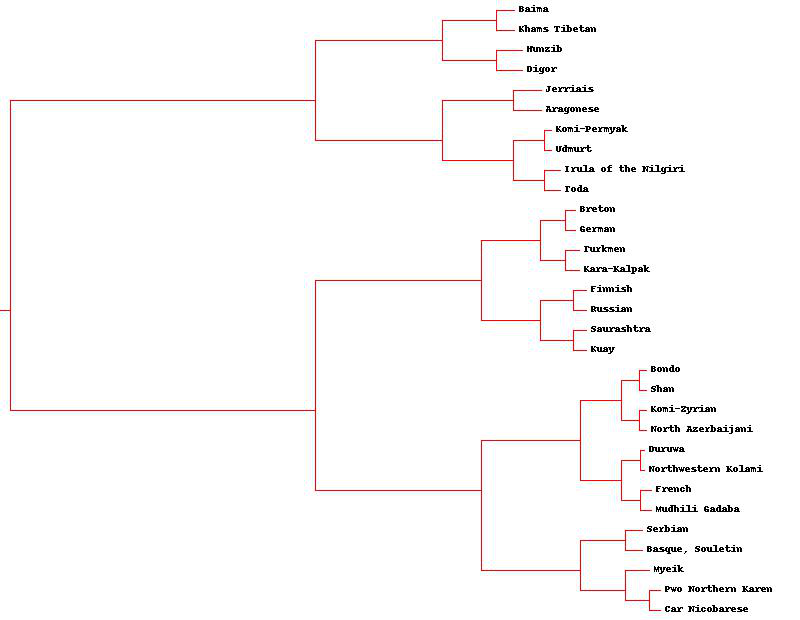

In [129]:
Image.open('clusters.jpg')

Дальше то, что на паре делали

In [ ]:
df_languages.loc[df_languages['Name'] == 'Eastern Armenian']

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name
170,nucl1235,Eastern Armenian,Eurasia,40.0,45.0,nucl1235,hye,indo1319,Indo-European


In [ ]:
df_languages.loc[df_languages['Name'] == 'Basque']

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name
178,basq1248,Basque,Eurasia,43.2787,-1.31622,basq1248,eus,NaN,NaN


In [ ]:
Eastern_Armenian = df_values.loc[df_values['Language_ID'] == 'nucl1235'].loc[df_values['Contribution_ID'] == 171]

In [ ]:
Basque = df_values.loc[df_values['Language_ID'] == 'basq1248'].loc[df_values['Contribution_ID'] == 179]

In [ ]:
Basque

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Marginal,Allophones,Contribution_ID
6871,6872,basq1248,72FB536ACFF408163656BBCDAFCAC6F6,a,NaN,NaN,ndiaye1970;gavel1929,NaN,a,179.0
6872,6873,basq1248,694212B746622E482E0E58D50036100E,b,NaN,NaN,ndiaye1970;gavel1929,NaN,β b,179.0
6873,6874,basq1248,852A220443D41F0A63671A2F4DEC9788,c,NaN,NaN,ndiaye1970;gavel1929,NaN,c,179.0
6874,6875,basq1248,E6253384902D489FDB1FE487B7ED4AB2,d,NaN,NaN,ndiaye1970;gavel1929,NaN,ð d,179.0
6875,6876,basq1248,258C639F2F822CD1D56805F5397712E4,e̞,NaN,NaN,ndiaye1970;gavel1929,NaN,e̯ e̞,179.0
6876,6877,basq1248,86E80A7DA80F7F58CA76F85BACA48F86,f,NaN,NaN,ndiaye1970;gavel1929,NaN,f,179.0
6877,6878,basq1248,ECC959553F23387998DAF88D69D7736C,ɡ,NaN,NaN,ndiaye1970;gavel1929,NaN,ɡ ɣ,179.0
6878,6879,basq1248,CF50E15F866A7B9698A8F95C5C9B48B2,ɪ,NaN,NaN,ndiaye1970;gavel1929,NaN,ɪ̯ ɪ ɪ,179.0
6879,6880,basq1248,320B62404207303F61B0F772296C9545,ɟ,NaN,NaN,ndiaye1970;gavel1929,NaN,ʝ ɟ ɟ,179.0
6880,6881,basq1248,5A838FF4DABE1950734CFAFAB9383903,k,NaN,NaN,ndiaye1970;gavel1929,NaN,k,179.0


In [ ]:
EA_list = Eastern_Armenian['Value'].to_list()

In [ ]:
B_list = Basque['Value'].to_list()

In [ ]:
EA_list = sorted(EA_list)
B_list = sorted(B_list)

In [ ]:
levenshtein(EA_list, B_list)

25

In [ ]:
code = df_languages.loc[df_languages['Name'] == 'Russian']['ID'].to_list()[0]

In [ ]:
code

'russ1263'

In [ ]:
Russian = df_values.loc[df_values['Language_ID'] == code]

In [ ]:
Russian = Russian.loc[df_values['Source'] == 'yanushevskaya2015russian']

In [ ]:
R_list = sorted(set(Russian['Value'].to_list()))

In [ ]:
levenshtein(R_list, B_list)

33

In [ ]:
levenshtein(R_list, EA_list)

35

In [ ]:
code2 = df_languages.loc[df_languages['Name'] == 'Ukrainian']['ID'].to_list()[0]

In [ ]:
code2

'ukra1253'

In [ ]:
Ukrainian = df_values.loc[df_values['Language_ID'] == code2]
Ukrainian

,ID,Language_ID,Parameter_ID,Value,Code_ID,Comment,Source,Marginal,Allophones,Contribution_ID
47524,35820,ukra1253,72FB536ACFF408163656BBCDAFCAC6F6,a,NaN,NaN,ukr_pugh1999,False,a,1035.0
47525,35821,ukra1253,694212B746622E482E0E58D50036100E,b,NaN,NaN,ukr_pugh1999,False,b bʲ,1035.0
47526,35822,ukra1253,198E3EBE25854A256D6C67EF286FA260,d̪,NaN,NaN,ukr_pugh1999,False,d̪ d̪ʲ,1035.0
47527,35823,ukra1253,30D03C9A011ADC5852F9D5AF75161372,d̪z̪,NaN,NaN,ukr_pugh1999,False,d̪z̪ dz̪ʲ,1035.0
47528,35824,ukra1253,C7364BE7F76504D8DE329FFF30C42424,d̠ʒ,NaN,NaN,ukr_pugh1999,False,d̠ʒ,1035.0
...,...,...,...,...,...,...,...,...,...,...
177271,90392,ukra1253,F62AFB705D2A2D30BB41CF3FBE917891,x,NaN,NaN,buk2008some,False,NaN,2503.0
177272,90393,ukra1253,88C287E17AC15E89E601F9D81D0374B5,z̪,NaN,NaN,buk2008some,False,NaN,2503.0
177273,90394,ukra1253,8E44A85109C21D52844028D1BF295567,z̪ʲ,NaN,NaN,buk2008some,False,NaN,2503.0
177274,90395,ukra1253,DAC6AC8BCA2D24EFF188A7129D280801,ʒ,NaN,NaN,buk2008some,False,NaN,2503.0


In [ ]:
U_list = sorted(set((Ukrainian.loc[df_values['Contribution_ID'] == 1035]['Value'].to_list())))

In [ ]:
U_list

['a',
 'b',
 'd̠ʒ',
 'd̪',
 'd̪z̪',
 'f',
 'h',
 'i',
 'j',
 'k',
 'l̪',
 'm',
 'n̪',
 'p',
 'r̪',
 's̪',
 't̠ʃ',
 't̪',
 't̪s̪',
 'u',
 'v',
 'w',
 'x',
 'z̪',
 'ɔ',
 'ɛ',
 'ɡ',
 'ɪ',
 'ʃ',
 'ʒ']

In [ ]:
U_list = U_list[: int(len(U_list) / 2)]

In [ ]:
U_list

['ɑ',
 'b',
 'd̪',
 'd̪ʲ',
 'd̪z̪',
 'd̪z̪ʲ',
 'd̠ʒ',
 'ɛ',
 'f',
 'ɡ',
 'ɦ',
 'i',
 'ɪ',
 'j',
 'k',
 'lʲ',
 'ɫ',
 'm',
 'n̪',
 'n̪ʲ',
 'ɔ',
 'p',
 'r',
 'rʲ',
 's̪',
 'sʲ',
 'ʃ',
 'ʃʲː',
 't̪',
 'tʲ',
 't̪s̪',
 't̪s̪ʲ',
 't̠ʃ',
 't̠ʃʲː',
 'u',
 'ʋ',
 'x',
 'z̪',
 'z̪ʲ',
 'ʒ',
 'ʒʲː']

In [ ]:
levenshtein(EA_list, U_list)

31